## Investigate a Dataset (The Movie Database TMDb)
#### May-20,2020
#### Udacity - Data Analyst Nanodegree
# Duaa Algethami
### Project2 – Investigate a Dataset (The Movie Database TMDb)
#### Riyadh, Saudi Arabia


# Project: Investigate a Dataset (The Movie Database TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### Overview
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
#### Question that can analyised from this data set 
* Question 1 : Movie with Highest And Lowest Budget?
* Question 2 : Movie with Longest And Shortest Runtime?
* Question 3 : What is the top 10 popular movies?
* Question 4 : What are the most frequent words used in Romance and Action genres.
* Question 5 : Which genre were more successful?

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Cleansing: Checking for problems with the collected data, such as missing data or measurement error, data type of columns, etc.)

Defining questions: Identifying relationships between variables that are particularly interesting or unexpected.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "movies_df"
movies_df = pd.read_csv('movies.csv')
#printing first five rows with defined columns of movies database
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- To make our calculation more understandable, we will delete unused data.
- The data set is missing the unit of currency.
- Cast columns is seperated by "|".

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

we will delete these columns : 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'overview', 'production_companies', 'vote_count'and 'vote_average'.

In [4]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#checking null values 
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Data Cleaning (Removing the unused information from the dataset)
After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
2. Removing the duplicacy in the rows(if any).
3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries.
4. Changing release date column into date format.
5. Changing format of budget and revenue column.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#creating a list of column to be deleted

del_column = ['imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'overview', 'production_companies', 'vote_count', 'vote_average']
movies_df = movies_df.drop(del_column, axis=1)
movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2015


In [9]:
movies_df.shape

(10866, 13)

The data set has 10866 rows and 13 columns

In [10]:
movies_df = movies_df.drop_duplicates(keep='first')
movies_df.shape

(10865, 13)

There was only one duplicated row

In [11]:
# replacing all the zeros from revenue and budget columns.
columns= ['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
movies_df[columns] = movies_df[columns].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
movies_df.dropna(subset = columns, inplace = True)

rows, col = movies_df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


In [12]:
#Release date in object instead of datetime.Let's fix it.
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df.dtypes

id                         int64
popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [13]:
#changing data type of budget and revenue column

col_type=['budget', 'revenue']
#changing data type
movies_df[col_type]= movies_df[col_type].applymap(np.int64)
movies_df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Movie with Highest And Lowest Budget?

- We used 'idmin' and 'idmax' functions to find the index of lowest and highest movie budget 

In [14]:
#print the row related to this index
def find_minmax(x):
    
    #use the function 'idmin' to find the index of lowest movie budget
    min_index = movies_df[x].idxmin()
    
    #use the function 'idmax' to find the index of Highest movie budget
    high_index = movies_df[x].idxmax()
    high = pd.DataFrame(movies_df.loc[high_index,:])
    low = pd.DataFrame(movies_df.loc[min_index,:])
    
     #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",movies_df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",movies_df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Lost & Found


,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95


- Plotting the top 10 highest budget movies.

In [15]:
info = pd.DataFrame(movies_df['budget'].sort_values(ascending = False))
info['original_title'] = movies_df['original_title']
info.head()

,budget,original_title
2244,425000000,The Warrior's Way
3375,380000000,Pirates of the Caribbean: On Stranger Tides
7387,300000000,Pirates of the Caribbean: At World's End
14,280000000,Avengers: Age of Ultron
6570,270000000,Superman Returns


- The 'budget' column has been sorted in decending order and store it in the new dataframe.

In [16]:
data = list(map(str,(info['original_title'])))

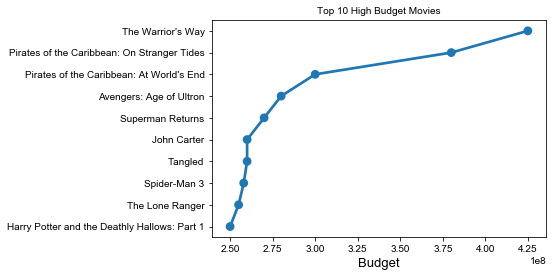

In [17]:
#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,6)})
ax.set_title("Top 10 High Budget Movies",fontsize = 10)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 2  : Movie with Longest And Shortest Runtime?

In [18]:
find_minmax('runtime')

Movie Which Has Highest runtime :  Carlos
Movie Which Has Lowest runtime  :  Kid's Story


,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
runtime,338,15


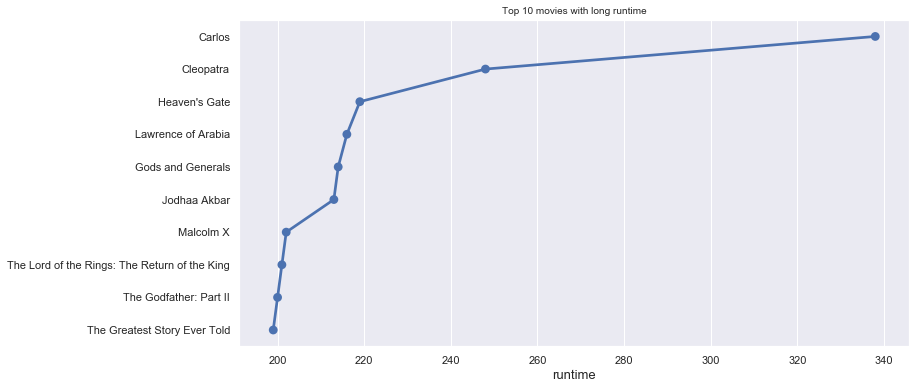

In [19]:
#make a plot which contain top 10 longest runtime movies.
#sort the 'runtime' column in decending order and store it in the new dataframe.
runtime = pd.DataFrame(movies_df['runtime'].sort_values(ascending = False))
runtime['original_title'] = movies_df['original_title']

data1 = list(map(str,(runtime['original_title'])))

#extract the top 10 runtime movies data from the list and dataframe.
x = list(data1[:10])
y = list(runtime['runtime'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,6)})
ax.set_title("Top 10 movies with long runtime",fontsize = 10)
ax.set_xlabel("runtime",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 3  : What is the top 10 popular movies?

- We change the data type for 'popularity' column from float to integr.

In [20]:
movies_df['popularity'] = movies_df['popularity'].apply(np.int64)

In [21]:
find_minmax('popularity')

Movie Which Has Highest popularity :  Jurassic World
Movie Which Has Lowest popularity  :  Ricki and the Flash


,0,157
id,135397,275601
popularity,32,0
budget,150000000,18000000
revenue,1513528810,41325328
original_title,Jurassic World,Ricki and the Flash
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Meryl Streep|Kevin Kline|Mamie Gummer|Sebastia...
director,Colin Trevorrow,Jonathan Demme
tagline,The park is open.,Get Ready for Ricki.
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,homophobia|rock star|aging|family relationship...
runtime,124,100


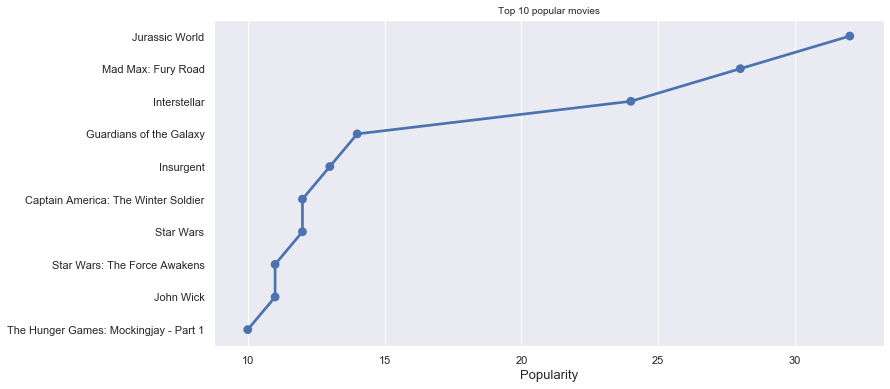

In [22]:
#make a plot which contain top 10 popular movies.
#sort the 'popularity' column in decending order and store it in the new dataframe.
runtime = pd.DataFrame(movies_df['popularity'].sort_values(ascending = False))
runtime['original_title'] = movies_df['original_title']

data1 = list(map(str,(runtime['original_title'])))

#extract the top 10 popular movies data from the list and dataframe.
x = list(data1[:10])
y = list(runtime['popularity'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,6)})
ax.set_title("Top 10 popular movies",fontsize = 10)
ax.set_xlabel("Popularity",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 4  : What are the most frequent words used in Romance and Action genres.

- We separated both genres and keywords columns by using separate function.
- We also used melt function to create diffrent dataframe.

In [23]:
def separate(data):
    return data.str[0:].str.split('|',expand = True)
genres = separate(movies_df['genres'])
keywords = separate(movies_df['keywords'])

In [24]:
genres['id'] = movies_df['id']
keywords['id'] = movies_df['id']

In [25]:
def melt(df,col_name):
    return pd.melt(df,id_vars = 'id',value_name = col_name).drop(labels = 'variable',axis = 1)
genres = melt(genres,'genres')
keywords = melt(keywords,'keywords')

In [26]:
genres.dropna(inplace = True)
keywords.dropna(inplace = True)

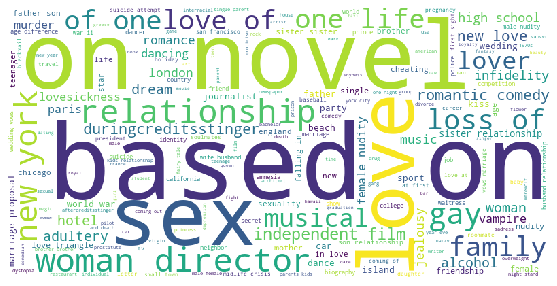

In [27]:
gen_key = pd.merge(genres,keywords, on = 'id')

stopwords = set(STOPWORDS)
cloud = WordCloud(width=800, height=400,background_color="white", max_words=200,stopwords=stopwords)
plt.figure( figsize=(10,5) );
Rom_cloud = cloud.generate(gen_key.loc[gen_key['genres'] == 'Romance', 'keywords'].str.cat(sep= '\n'))
plt.imshow(Rom_cloud);
plt.axis('off');

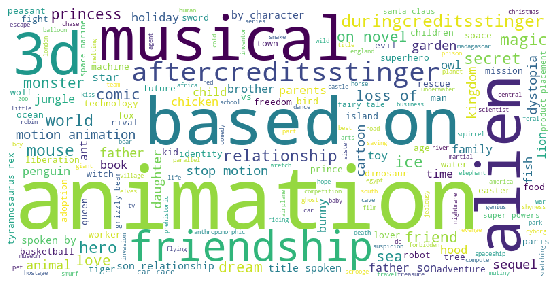

In [28]:
stopwords = set(STOPWORDS)
cloud = WordCloud(width=800, height=400,background_color="white", max_words=200,stopwords=stopwords)
plt.figure( figsize=(10,5) );
Animation_cloud = cloud.generate(gen_key.loc[gen_key['genres'] == 'Animation','keywords'].str.cat(sep = '\n'))
plt.imshow(Animation_cloud)
plt.axis('off');

### Research Question 5  : Which genre were more successful?

- We used this function to extract and count the data.

In [29]:
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = movies_df[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [30]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

### Lets visualize this with a plot.

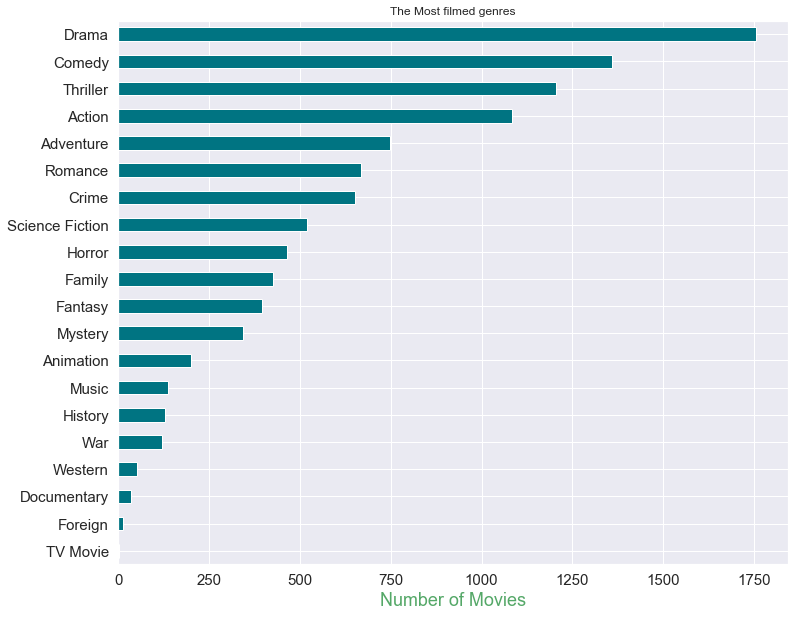

In [31]:
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

- As we can see from the plot, the most successful genres are 'Drama', 'Comedy','Thriller' and 'Action'.

<a id='conclusions'></a>
## Conclusions
* 'The Warrior's Way' has the highest budget where 'Lost & Found' has the lowest one.
* ' Carlos' has the longest runtimet where 'Kid's Story' has the shortest one.
* The top 10 popular movies: 
 1. Jurassic 
 2. Mad Max: Fury Road 
 3. Interstellar
 4. Guardians of the Galaxy
 5. Insurgent
 6. Captain America: The Winter Soldier
 7. Star Wars
 8. Star Wars: The Force Awakens
 9. John Wick
 10. The Hunger Games: Mockingjay - Part 1
* From the wordcloud, we can see that the most frequent words used in romance are 'love', 'women' and 'noval'.
* From the wordcloud, we can see that the most frequent words used in animation are 'musical', 'animation' and '3d'.
* Movies are mostly made in drama, comedy, thriller, action, romance, adventure .

# Limitations:
- We don't know if the data is correct or up-to-date.
- Dropping null values might effect our analysis.
- The dataset is missing the unit of currency.
- Dealing with data type was a bit confusing when I used some functions. 

# References: 
- https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset
- https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/.ipynb_checkpoints/investigate-a-dataset-template-checkpoint.ipynb